# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 17, 2016 5:59PM**

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

    Jiexuan Sun
    
    Congyang Wang
    
    Chao Xu
    
    Zhaoning Su

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Enthought Canopy)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code:
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

### Answer_1:

n_samples: 2000
0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.01
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.85; std - 0.02

Best Parameter:
1

             precision    recall  f1-score   support

        neg       0.89      0.85      0.87       235
        pos       0.87      0.91      0.89       265

avg / total       0.88      0.88      0.88       500

[[199  36]
 [ 24 241]]


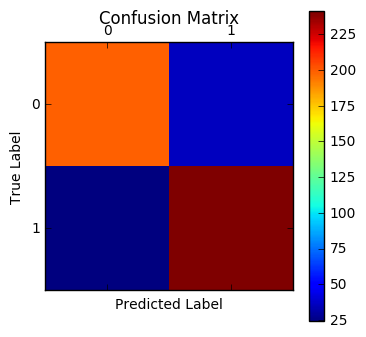

In [1]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

#Load the data 
dataset = load_files('review_polarity/txt_sentoken', shuffle=False)
print("n_samples: %d" % len(dataset.data))

#Split the data into test dataset and training dataset
docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.25, random_state=22)

#Build a pipeline
pipeline = Pipeline([('vect', TfidfVectorizer(min_df=3, max_df=0.95)),('clf', LinearSVC(C=1000)),])

#Find the parameter and analyze their performance
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1)
grid_search.fit(docs_train, y_train)

n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i])) 
print('')
print('Best Parameter:')
print(grid_search.best_index_)
print('')
#Test and evaluate the model
y_predicted = grid_search.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted,target_names=dataset.target_names))
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

import matplotlib.pyplot as plt
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

### Answer_2:

##### Definition of TF-IDF:
TF-IDF, which is the short term of 'term frequency - inverse document frequency', is a widely used in information retrieval and text mining. It's a numerical statistics showing each word's importance to a document in a collection or corpus. Compared with traditional term frequency statistic, it adjusts the effect of those often-used words, which might appear frequently in general, by considering the IDF.
###### Definition of some parameters:
    1.min_df(float in range [0.0, 1.0] or int, default=1): 
When using integer value, if the document frequency of including the target word smaller than this threshold, we ignore the word. When using float number, if the document propotion of including the target word smaller than this threshold, we ignore the word. It will filter some words which appear in a limited number of documents, when converting to TF-IDF features. See the following examples.

    2.max_df(float in range [0.0, 1.0] or int, default=1.0):
When using integer value, if the document frequency of including the target word larger than this threshold, we ignore the word. When using float number, if the document frequency of including the target word larger than this threshold, we ignore the words. It will filter some words which appears in most of the documents, when converting to TF-IDF features. See the follwoing examples.

    3.ngram_range(tuple (min_n, max_n)):
It limit the boundary of the range of n-values for different n-grams to be extracted. (min_n < extracing n < max_n)
See the following examples.


The number of features under default(max_df=1.0, min_df=1)
(1800, 38134)
The number of features under max_df=0.95, min_df=3
(1800, 17633)
change the max_df we will get different countings of the target words:


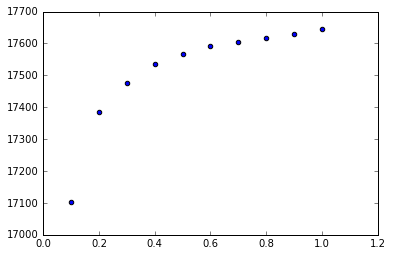

change the min_df we will get different countings of the target words:


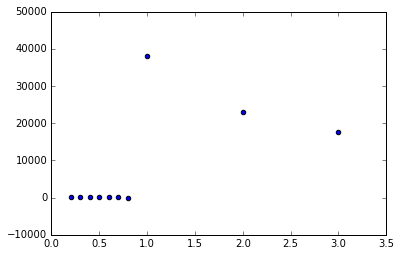

The number of features under default(ngram_range(1,1))
(1800, 38134)
The number of features under ngram_range(1,2)
(1800, 498229)
The number of features under ngram_range(2,2)
(1800, 460095)


In [5]:
import numpy as np
import json

#For min_df and max_df:
#The defaults for min_df and max_df are 1 and 1.0, respectively.
#If target term is found in only 1 document, then it's ignored.
#If it's found in all documents (100% or 1.0), then it's ignored. 
vectorizer = TfidfVectorizer()
train_tfidf_1 = vectorizer.fit_transform(docs_train)
print('The number of features under default(max_df=1.0, min_df=1)')
print(train_tfidf_1.shape)

#If target term is found less than 3 documents, then it's ignored
#If it's found in more than 95% of all document, then it's ignored
vectorizer = TfidfVectorizer(max_df=0.95, min_df=3)
train_tfidf_2 = vectorizer.fit_transform(docs_train)
print('The number of features under max_df=0.95, min_df=3')
print(train_tfidf_2.shape)

#change the max_df
max_dfx = np.linspace(0.1,1,10)
max_list=[]
for i in range(10):
    vectorizer = TfidfVectorizer(max_df=max_dfx[i], min_df=3)
    train_tfidf_max = vectorizer.fit_transform(docs_train)
    max_list.append(train_tfidf_max.shape[1])
print("change the max_df we will get different countings of the target words:")
plt.scatter(max_dfx, max_list)
plt.show()

#change the min_df
min_dfx = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,1,2,3] # here can show both the min_dfx<1 and min_dfx>1
min_list=[]
for i in range(10):
    vectorizer = TfidfVectorizer(max_df=0.95,min_df=min_dfx[i])
    train_tfidf_min = vectorizer.fit_transform(docs_train)
    min_list.append(train_tfidf_min.shape[1])
print("change the min_df we will get different countings of the target words:")
plt.scatter(min_dfx, min_list)
plt.show()

#For ngram_range:
#The defaults for min_n and max_n are both 1, which means we only consider unigram.
vectorizer = TfidfVectorizer()
train_tfidf_3 = vectorizer.fit_transform(docs_train)
print('The number of features under default(ngram_range(1,1))')
print(train_tfidf_3.shape)

#By setting min_n=1 and max_n=2, it means we consider both unigram and bigram.
vectorizer = TfidfVectorizer(ngram_range=(1,2))
train_tfidf_4 = vectorizer.fit_transform(docs_train)
print('The number of features under ngram_range(1,2)')
print(train_tfidf_4.shape)

#By setting min n=2 and max n=2, it means we consider only bigram.
vectorizer = TfidfVectorizer(ngram_range=(2,2))
train_tfidf_5 = vectorizer.fit_transform(docs_train)
print('The number of features under ngram_range(2,2)')
print(train_tfidf_5.shape)


*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

### Answer_3:

In [3]:
#We randomly pick some parameters to fit the TifidfVectorizer using docs_train and compute the 'Xtrain' and 'Xtest'.
Xtrain = TfidfVectorizer(docs_train, ngram_range=(1,1), max_df=0.95, min_df=3)
Xtest = TfidfVectorizer(docs_train, ngram_range=(1,1), max_df=0.95, min_df=3)


0 params - {'vect__ngram_range': (1, 1), 'clf__C': 0.1, 'vect__max_df': 0.85, 'vect__min_df': 2}; mean - 0.81; std - 0.01
1 params - {'vect__ngram_range': (1, 2), 'clf__C': 0.1, 'vect__max_df': 0.85, 'vect__min_df': 2}; mean - 0.82; std - 0.01
2 params - {'vect__ngram_range': (1, 1), 'clf__C': 0.1, 'vect__max_df': 0.85, 'vect__min_df': 6}; mean - 0.81; std - 0.01
3 params - {'vect__ngram_range': (1, 2), 'clf__C': 0.1, 'vect__max_df': 0.85, 'vect__min_df': 6}; mean - 0.82; std - 0.01
4 params - {'vect__ngram_range': (1, 1), 'clf__C': 0.1, 'vect__max_df': 0.85, 'vect__min_df': 10}; mean - 0.82; std - 0.01
5 params - {'vect__ngram_range': (1, 2), 'clf__C': 0.1, 'vect__max_df': 0.85, 'vect__min_df': 10}; mean - 0.81; std - 0.01
6 params - {'vect__ngram_range': (1, 1), 'clf__C': 0.1, 'vect__max_df': 0.9, 'vect__min_df': 2}; mean - 0.80; std - 0.01
7 params - {'vect__ngram_range': (1, 2), 'clf__C': 0.1, 'vect__max_df': 0.9, 'vect__min_df': 2}; mean - 0.81; std - 0.01
8 params - {'vect__ngram

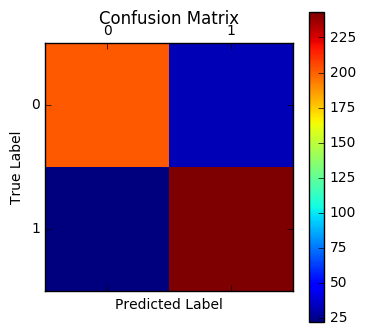

In [4]:
#LinearSVC

#We use the GridSearchCV to find the best parameters from different combination for TfidVectorizer and LinearSVC classifier.
pipeline = Pipeline([('vect', TfidfVectorizer()),
                     ('clf', LinearSVC()),])
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'vect__max_df': (0.85, 0.9, 0.95),
              'vect__min_df': (2,6,10),
              'clf__C': (0.1,1,100,1000) }
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1)
grid_search.fit(docs_train, y_train)
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

#We draw the confusion matrix
y_predicted = grid_search.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))
cm = metrics.confusion_matrix(y_test, y_predicted)
print('')
print('Best Parameter:')
print(grid_search.best_index_)
print('')
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


0 params - {'vect__ngram_range': (1, 1), 'knn__n_neighbors': 3, 'vect__max_df': 0.85, 'vect__min_df': 2}; mean - 0.66; std - 0.01
1 params - {'vect__ngram_range': (1, 2), 'knn__n_neighbors': 3, 'vect__max_df': 0.85, 'vect__min_df': 2}; mean - 0.67; std - 0.03
2 params - {'vect__ngram_range': (1, 1), 'knn__n_neighbors': 3, 'vect__max_df': 0.85, 'vect__min_df': 6}; mean - 0.66; std - 0.02
3 params - {'vect__ngram_range': (1, 2), 'knn__n_neighbors': 3, 'vect__max_df': 0.85, 'vect__min_df': 6}; mean - 0.67; std - 0.02
4 params - {'vect__ngram_range': (1, 1), 'knn__n_neighbors': 3, 'vect__max_df': 0.85, 'vect__min_df': 10}; mean - 0.67; std - 0.01
5 params - {'vect__ngram_range': (1, 2), 'knn__n_neighbors': 3, 'vect__max_df': 0.85, 'vect__min_df': 10}; mean - 0.67; std - 0.01
6 params - {'vect__ngram_range': (1, 1), 'knn__n_neighbors': 3, 'vect__max_df': 0.9, 'vect__min_df': 2}; mean - 0.66; std - 0.01
7 params - {'vect__ngram_range': (1, 2), 'knn__n_neighbors': 3, 'vect__max_df': 0.9, 'vec

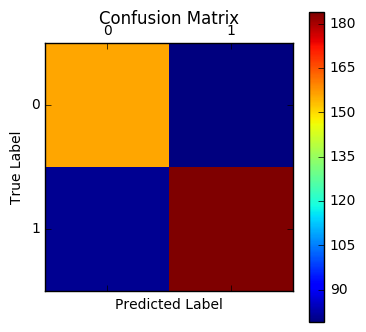

In [5]:
#KNeighborsClassifier

#We use the GridSearchCV to find the best parameters for TfidVectorizer and KNeighbors classifier.
from sklearn.neighbors import KNeighborsClassifier
pipeline = Pipeline([('vect', TfidfVectorizer()),
                     ('knn', KNeighborsClassifier()),])
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'vect__max_df': (0.85, 0.9, 0.95),
              'vect__min_df': (2,6,10),
              'knn__n_neighbors': (3,5,7,9) }
grid_search = GridSearchCV(pipeline, parameters, n_jobs=1)
grid_search.fit(docs_train, y_train)
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

#We draw the confusion matrix
y_predicted = grid_search.predict(docs_test)
print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))
cm = metrics.confusion_matrix(y_test, y_predicted)
print('')
print('Best Parameter:')
print(grid_search.best_index_)
print('')
print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


### 3.1 Does one classifier, or one set of parameters work better?

##### * parameters:
For LinearSVC, the best parameter set are {'vect_max_df': 0.85, 'vect_ngram_range': (1, 2), 'clf_C': 1, 'vect_min_df': 6}.

For KNeighborsClassifier, the best parameter set are {'vect_min_df': 6, 'vect_ngram_range': (1, 1),'knn_n_neighbors': 7, 'vect_max_df': 0.85}.

They are the best parameter set for its corresponding classification method beacause they are selected by GridSearchCV function.

##### * Classifier:
After setting each classifier's optimized parameters, then we could test each classifier using test dataset and compare their confusion matrix/accuracy rate. The LinearSVC's accuracy rate is 0.89. The KNeighborsClassifier's accuracy rate is 0.68. Obviously, we choose LinearSVC method with its best parameter set because of higher accuracy rate.


### 3.2 For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.

Under the LinearSVC with its best parameter set {'vect_max_df': 0.85, 'vect_ngram_range': (1, 2), 'clf_C': 1, 'vect_min_df': 10}, we take 2 examples where the prediction was incorrect.

##### *  The first incorrect review(cv978_20929):
We incorrectly classify this review into negetive review. Actually, it should be positive.
There're two main reasons we think to cxplain the error: 1. There're too many negative words in this review since it is a horrible movie. Even though the writer want to express an appreciate on this horrible movie, it still need too much negative words to describe the plot like "kill", "crime", "jail" and so on. Because of these negative words, we may get the wrong prediction. 2.There are few positive words used in this review, only one "good" and one "great", the positive words' frequency is too small.

##### *  The second incorrect review(cv296_12251):
We incorrectly classify this review into negative review. Actually, it should be positive.
The main reason is that he uses a few possible words. So that even the author doesn't use many negative words, it still can't be predicted as a possible one easily. Also the words "tear", "just" promote the review predicted as a negative review.


In [9]:
print(y_predicted)
print(y_test)
wrong=[]
for i in range(len(y_test)):
    if(y_test[i] != y_predicted[i]):
        wrong.append(i)
print(wrong)
print(' ')
print('##First incorrect review:')
print('---------------------------------')
print(docs_test[wrong[1]])
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(' ')
print('##Second incorrect review:')
print('---------------------------------')
print(docs_test[wrong[2]])


[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1
 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0
 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0
 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1
 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0
 0 1 0 1 1 1 1 0 1 1 0 0 

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

### Answer_4:

#### Plot #4.1:  'The distribution of Features'

##### Annotation:
* Bubble: Features(Words).
* Bubble Size: The number of reviews contains the feature.
* Bubble Color: The proportion of positive reviews contains the feature. 
* X-axis: The proportion of positive reviews contains the feature.
* Y-axis: The average TF-IDF of the feature.

Bubbles, which are on the left with light color, represent features appearing mostly in the negative review. Bubbles, which are on the right with dark red color, represent features appearing mostly in the positive review. What's more, the bubble will be larger, if more review contains the feature. So, large bubbles(features) on the left/right side are the keys to distinguish negative and positive reviews.

##### Warnning:
* If you cannot see the plot, please view the plot at the following url address or run the code.

In [10]:
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
from operator import truediv
from sklearn.feature_extraction.text import CountVectorizer

#Compute the count_vect.
count_vect = CountVectorizer(min_df=300, max_df=0.95, stop_words='english', ngram_range=(1,2))
X_train_counts = count_vect.fit_transform(dataset.data)
features = count_vect.get_feature_names()

total_num_words = len(X_train_counts.toarray()[1])
total_num_files = len(X_train_counts.toarray())
print('Total number of files:')
print(len(X_train_counts.toarray()))
print('Total number of words:')
print(len(X_train_counts.toarray()[1]))

#Compute the TF-IDF.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

sum_words_tfidf = [0] * total_num_words
sum_words_sentiment = [0] * total_num_words
n = [0] * total_num_words

#Compute the proportion of positive reviews contains the feature and 
#compute the number of reviews contains the feature and 
#compute the the average TF-IDF of the feature.

for j in range(total_num_files):
    if ((j+1) % 250) == 0:
        print('Working on...')
        print(j+1)
    for i in range(total_num_words):
        sum_words_tfidf[i] = X_train_tfidf.toarray()[j][i] + sum_words_tfidf[i]
        if X_train_tfidf.toarray()[j][i] > 0:
            n[i] = n[i] + 1
            sum_words_sentiment[i] = dataset.target[j] + sum_words_sentiment[i]

y = [num / total_num_files for num in sum_words_tfidf]*10

x = [0] * total_num_words
for i in range(len(n)):
    if n[i] != 0:
        x[i] = (x[i] + (sum_words_sentiment[i]/n[i]))

size = n

#Plot the graph.
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('JasonSun23', 'ze2jekbjzj')
data = [
    {
        'x': x,
        'y': y,
        'text': features,
        'mode': 'markers',
        'marker': {
            'color': x,
            'size': size,
            'sizeref': 40,
            'showscale': True
        }
    }
]

py.iplot(data, filename='scatter-colorscale')


Total number of files:
2000
Total number of words:
182
Working on...
250
Working on...
500
Working on...
750
Working on...
1000
Working on...
1250
Working on...
1500
Working on...
1750
Working on...
2000
High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~JasonSun23/0 or inside your plot.ly account where it is named 'scatter-colorscale'


#### Plot #4.2:  'Reviews Clustering under PCA '

##### Annotation:
* Dot: Review.
* X-axis: Principal Component. 
* Y-axis: Principal Component.
* Color: Cluster.

##### a.
We use PCA to 'derive' the component. Then, we use clustering method - 'K-Means' to cluster each reviews into two groups shown in different color as below. We try to do the PCA to reduce the dimension of the data set first. In this case we use the CountVectorizer() and TfidfTransformer() as two variable who are used as standard to clustering the data. The CountVectorizer() function will get a frequency matrix of the reviews. The TfidfTransformer() function will calculate the tf-idf value of each words. By PCA we can get a 2-dimension data set which used to scatterplot a 2D figure. Then we first perform the PCA's scatterplot, and then use the kmeans method, which is a kind of unsupervised learning method, to do the clustering. And we get the clustering result as the 2nd figure shows. Also we can list that which reviews are labeled as cluster 0 and which are labeled cluster 1. After all of that, we will use the actually table "pos" and "neg" to find the accuracy rate of our prediction.

n_samples: 2000
[[-0.21856524 -0.02653885]
 [ 0.06893883  0.01631688]
 [ 0.00323802  0.06893188]
 ..., 
 [-0.01580735  0.02836442]
 [ 0.08611339  0.03084009]
 [-0.01434169 -0.06214287]]
PCA Figures:


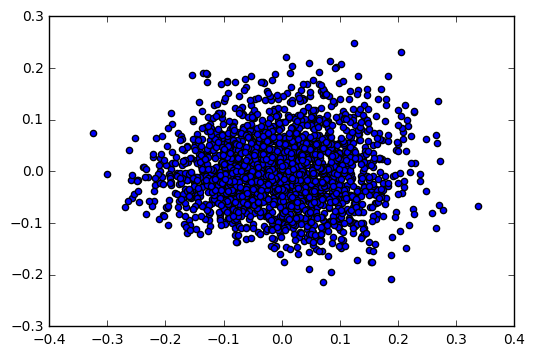

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Cluster Figures with Kmeans:


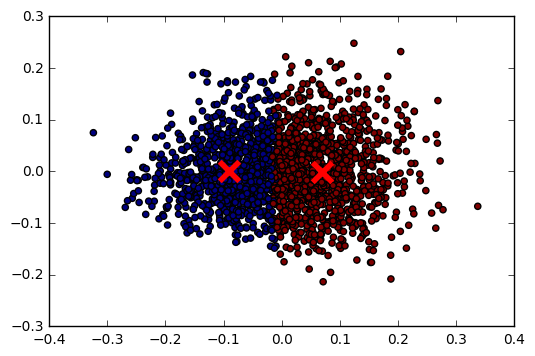

Cluster Result Count:
1    1130
0     870
Name: cluster, dtype: int64
Top Terms Per Cluster:
Cluster 0 Sample Counting Number from the doc_train Set: 1   5   8   12   14   16   17   20   24   25   33   34   35   36   37   45   46   47   49   50   51   52   55   57   58   60   63   66   70   72   73   78   79   82   83   87   89   97   103   106   109   112   116   117   121   122   126   128   129   130   132   136   137   144   145   146   148   153   155   158   161   165   166   167   168   172   173   175   176   180   182   184   186   190   192   198   200   201   203   204   208   209   212   213   217   223   225   226   227   231   233   236   238   243   246   250   251   252   253   254   259   262   265   266   268   273   274   278   284   285   286   288   289   290   291   299   301   302   303   304   307   308   309   311   313   314   321   322   323   328   332   333   335   337   338   342   343   346   352   353   354   357   359   360   362   366   367   370   371

In [11]:
import sys
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

if __name__ == "__main__":
    movie_reviews_data_folder = sys.argv[1]
    dataset = load_files('review_polarity/txt_sentoken', shuffle=False)
    print("n_samples: %d" % len(dataset.data))
docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.0, random_state=None)

pipeline = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer())])      #do the count and the tf-idf on data  
X = pipeline.fit_transform(docs_train).todense()


pca = PCA(n_components=2).fit(X)  # do transvector in PCA
data2D = pca.transform(X)
print(data2D)
plt.scatter(data2D[:,0], data2D[:,1])
print("PCA Figures:")
plt.show() 

# now we get a 2D data set by PCA, we use KMeans to do the clusterring(a kind of unsupervised learning)
train_tfidf = TfidfVectorizer(docs_train)
tfidf_matrix = train_tfidf.fit_transform(docs_train)
terms = train_tfidf.get_feature_names()
countnumber= [x for x in range(1, 2001)]
word = np.array(countnumber)
weight = tfidf_matrix.toarray() 
km = KMeans(n_clusters=2, random_state=0) # do Kmeans on the 2D data in 2 clusters
kmeans = km.fit(data2D) 
ma=km.fit(weight)
clusters = kmeans.labels_.tolist()
plt.scatter(data2D[:,0], data2D[:,1],c=kmeans.labels_)
print(type(data2D[:,0]))
print(type(word))
# perform the figure on the before one
centers2D = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers2D[:,0], centers2D[:,1],s=200, linewidths=4, marker='x',c='r')
print("Cluster Figures with Kmeans:")
plt.show() 

#count the result
datafr = { 'x': data2D[:,0], 'y': data2D[:,1],'cluster': clusters,'word':word}
frame = pd.DataFrame(datafr, index = [clusters] , columns = ['x', 'y', 'cluster','word'])
print("Cluster Result Count:")
print(frame['cluster'].value_counts())


#get the result word
from __future__ import print_function

print("Top Terms Per Cluster:")
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(2):
    print("Cluster %d Sample Counting Number from the doc_train Set:" %i, end='')
    for title in frame.ix[i]['word'].values.tolist():
        print(' %s  ' %title, end='')
    print()

#### b.
In the first time we use the CountVectorizer() and TfidfTransformer() as two variable who are used as standard to cluster the data. However both of the frequency matrix and tf-idf value have the same weight. Now we assume that the possitive words will be more concentrated also the negative ones. So we add another variable, which reviews are these words come from, to cluster the data. The process is just like the 1st one. We compare the accuracy rate in this case with the first one.

n_samples: 2000
pca figures:


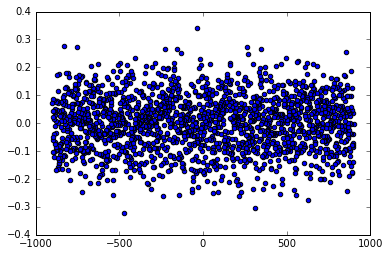

cluster figures with kmeans:


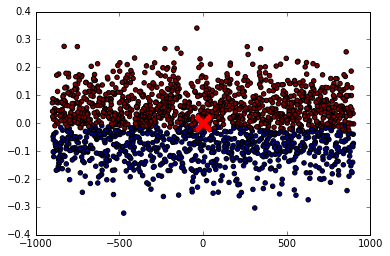

cluster result count:
1    1046
0     754
Name: cluster, dtype: int64
Top terms per cluster:
Cluster 0 sample counting number from the doc_train set: 2   3   5   6   7   8   9   10   13   17   18   22   24   25   27   28   29   32   33   40   47   48   49   54   55   56   59   61   62   65   74   78   81   85   88   90   91   92   93   97   99   101   103   104   105   108   109   113   124   128   130   133   134   136   139   145   146   148   154   156   157   160   161   162   165   166   167   169   170   171   177   178   183   184   185   188   191   193   194   200   203   204   207   209   210   211   213   218   224   227   230   231   232   234   235   240   241   246   251   253   257   258   260   262   265   267   270   272   276   283   285   291   294   295   296   297   298   302   306   314   318   320   328   330   331   334   337   341   343   344   345   347   349   352   354   355   356   358   360   367   369   370   371   374   377   380   382   384   388   390 

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import sys
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
%matplotlib inline

if __name__ == "__main__":
    movie_reviews_data_folder = sys.argv[1]
    dataset = load_files("review_polarity/txt_sentoken", shuffle=False)
    print("n_samples: %d" % len(dataset.data))
docs_train, docs_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.1, random_state=None)

pipeline = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer())])      #do the count and the tf-idf on data  
X = pipeline.fit_transform(docs_train).todense()


pca = PCA(n_components=2).fit(X)  # do transvector in PCA
data2D = pca.transform(X)
z = [x for x in range(1, 1801)]
data3D = np.insert(data2D, 2, values=z, axis=1) 
pca2 = PCA(n_components=2).fit(data3D) 
data2D = pca2.transform(data3D)
plt.scatter(data2D[:,0], data2D[:,1])
print("pca figures:")
plt.show() 

# now we get a 2D data set by PCA, we use KMeans to do the clusterring(a kind of unsupervised learning)
train_tfidf = TfidfVectorizer(docs_train)
tfidf_matrix = train_tfidf.fit_transform(docs_train)
terms = train_tfidf.get_feature_names()
countnumber= [x for x in range(1, 1801)]
word = np.array(countnumber)
weight = tfidf_matrix.toarray() 
km = KMeans(n_clusters=2, random_state=0) # do Kmeans on the 2D data in 2 clusters
kmeans = km.fit(data2D) 
ma=km.fit(weight)
clusters = kmeans.labels_.tolist()
plt.scatter(data2D[:,0], data2D[:,1],c=kmeans.labels_)
# perform the figure on the before one
centers2D = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers2D[:,0], centers2D[:,1],s=200, linewidths=4, marker='x',c='r')
print("cluster figures with kmeans:")
plt.show() 

#count the result
datafr = { 'x': data2D[:,0], 'y': data2D[:,1],'cluster': clusters,'word':word}
frame = pd.DataFrame(datafr, index = [clusters] , columns = ['x', 'y', 'cluster','word'])
print("cluster result count:")
print(frame['cluster'].value_counts())


#get the result word
from __future__ import print_function

print("Top terms per cluster:")
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(2):
    print("Cluster %d sample counting number from the doc_train set:" %i, end='')
    for title in frame.ix[i]['word'].values.tolist():
        print(' %s  ' %title, end='')
    print()
    
print(y_train)
print(kmeans.labels_)
wrong=[]
for i in range(len(y_train)):
    if(y_train[i] == kmeans.labels_[i]):
        wrong.append(i)

print('there are',len(wrong),'data with a wrong prediction')


# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 3-TEAM NUMBER ???".